In [1]:
import numpy as np
import random

#strike
K = 99

#Volatility
vol = 0.20

#Stock Price t=0
s_0 = 100

#Interest rate
r = 0.06

#Time to maturity is one year
T = 1

In [2]:
#Final price of stock
def fin_stock_price(s_0, power, dt):
    return s_0*(np.exp(vol*np.sqrt(dt))**(power))

#Price of option at expiration
def expiration_option_price(K, s_T):
    return max(0, s_T - K)

def fair_value(r, dt, p, prev_fair_val_1, prev_fair_val_2):
    return np.exp(-r*dt)*(p*(prev_fair_val_1) + (1 - p)*prev_fair_val_2)

In [6]:
row_list = []

def calculate_prev_row(dt, p):
    row_values = []
    #print(len(row_list))
    prev_row_values = row_list[len(row_list) - 1]
    #print(len(prev_row_values))
    for i in range(len(prev_row_values) -1):
        #print(i)
        fv = fair_value(r, dt, p, prev_row_values[i], prev_row_values[i+1])
        row_values.append(fv)
    row_list.append(row_values)

    
def option_pricer(steps, vol):
    dt = T/steps
    up_val = np.exp(vol*np.sqrt(dt))
    down_val = np.exp(-vol*np.sqrt(dt))
    p = (np.exp(r*dt) - down_val)/(up_val - down_val)
    #row_list = []
    leaf_nodes = []
    for i in range(steps, -steps-1, -2):
        s_T = fin_stock_price(s_0, i, dt)
        end_option_price = expiration_option_price(K, s_T)
        leaf_nodes.append(end_option_price)
    row_list.append(leaf_nodes)
    #print(leaf_nodes)




    for i in range(steps):
        calculate_prev_row(dt,p)

    return row_list[-1][0]
    
option_pricer(500, vol)

11.547481290156213

# Convergence

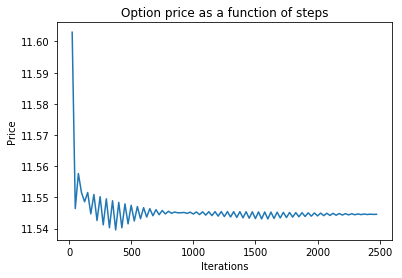

In [16]:
import matplotlib.pyplot as plt

xlist = [i*25 for i in range(1, 100)]
ylist = [option_pricer(i*25, vol) for i in range(1, 100)]

plt.figure()
plt.title('Option price as a function of steps')
plt.xlabel('Iterations')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

# Effect of volatility

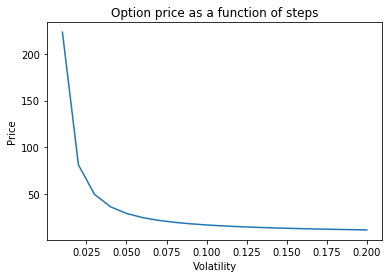

In [15]:
xlist = [i for i in np.linspace(0.01, 0.20, 20)]
ylist = [option_pricer(100, i) for i in np.linspace(0.01, 0.20, 20)]

plt.figure()
plt.title('Option price as a function of steps')
plt.xlabel('Volatility')
plt.ylabel('Price')
plt.plot(xlist, ylist)
plt.show()

# Computational Complexity/Compute time

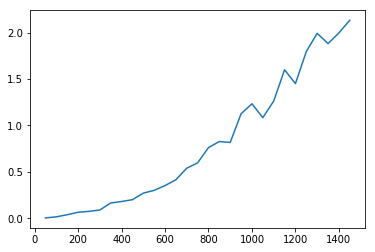

In [20]:
from timeit import default_timer as timer

time_list = []
for i in range(1, 30):
    start = timer()
    option_pricer(i*50, vol)
    end = timer()
    time_list.append(end - start)
    
iter_list = [i*50 for i in range(1, 30)]

plt.plot(iter_list, time_list)
plt.show()
    

# Compute delta

In [23]:
def calculate_delta(s_0, row_list):
    delta_list = []
    #Powers of up movement, increasing by one with each list in row_list 
    for j in range(1, len(row_list)-1):
        deltas = []
        #within each list
        for i in range(len(row_list[j]) - 1):
            delta = (row_list[j][i] - row_list[j][i+1])/(fin_stock_price(s_0, j-2*i , dt) - fin_stock_price(s_0, j-2*i, dt))
            deltas.append(delta)
        delta_list.append(deltas)
        


# American Options

In [ ]:
def american_stock_price(s_0, power, dt):
    return s_0*(np.exp(vol*np.sqrt(dt))**(power))

def american_fair_value(r, dt, p, prev_fair_val_1, prev_fair_val_2, K, s_t):
    
    return max(, np.exp(-r*dt)*(p*(prev_fair_val_1) + (1 - p)*prev_fair_val_2))
    

    